In [1]:
import sys; sys.path.insert(0, "..")
from src.models import NLM
from src.utils import generate_data

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

In [3]:
x, y, x_test = generate_data(number_of_points=50, noise_variance=30, input_dimension=2)

In [4]:
def f(x1, x2):
    return x1**3 + x2**3

x1 = np.linspace(-5, 5, 30)
x2 = np.linspace(-5, 5, 30)

X1, X2 = np.meshgrid(x1, x2)
Y = f(X1, X2)

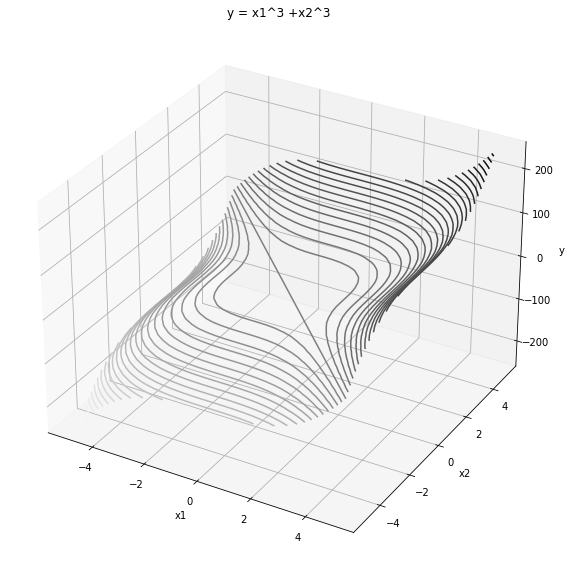

In [5]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Y, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('y = x1^3 +x2^3');

In [8]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

width = [50,20] # using the architecture used in the paper
hidden_layers = len(width)
input_dim = 2
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = NLM(architecture, random=random)
print('Number of parameters =',nn.D)

###define design choices in gradient descent
params = {
    'step_size':1e-3,
    'max_iteration':3000,
    'random_restarts':1,
    'reg_param':0.,
}

#fit my neural network to minimize MSE on the given data
reg_param = 0.

Number of parameters = 1191


In [ ]:
nn.fit(x, y, params)

Iteration 0 loss 9139.834534373682; gradient mag: 13049.511791820749
Iteration 100 loss 949.2221484890501; gradient mag: 2302.346638443577
Iteration 200 loss 527.2063534377288; gradient mag: 402.45434925373104
Iteration 300 loss 498.1084411527998; gradient mag: 135.89208361954252
Iteration 400 loss 478.69901796386955; gradient mag: 122.61175508202362
Iteration 500 loss 457.5892202622243; gradient mag: 121.44318396644356
Iteration 600 loss 434.42181062838245; gradient mag: 121.728179480456
Iteration 700 loss 408.9666138425514; gradient mag: 124.80117630261347
Iteration 800 loss 381.0216766060858; gradient mag: 124.08438810090392
Iteration 900 loss 350.44086213013975; gradient mag: 125.55354847644318
Iteration 1000 loss 317.36509723086465; gradient mag: 128.52659053560146
Iteration 1100 loss 281.97755538225033; gradient mag: 128.11187182229094
Iteration 1200 loss 244.74943752341053; gradient mag: 124.52241231774025
Iteration 1300 loss 206.13752963143827; gradient mag: 143.15557126892492


In [ ]:
plt.plot(nn.objective_trace)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### Examine MAP Model

In [ ]:
y_pred = nn.forward(nn.weights, x_test)

In [ ]:
plt.scatter(x[0,:], y.flatten(), color='red', alpha=0.5, label='Observed Data')
plt.plot(x_test[0,:], np.sum(x_test**3, axis=0), color='black', label="Ground Truth")
plt.plot(x_test[0,:], y_pred.flatten(), color='tab:blue', label="Model Prediction")
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Model Prediction for y = x1^3 +x2^3\n(projected onto x1 for visualization)")
plt.legend()
plt.show()

### Examine Prior Samples

In [ ]:
## WE SHOULD CONFIRM WHAT EXACT VALUES OF PRIOR VAR AND NOISE VAR THEY USED. THIS SEEMED TO AFFECT THE RESULTS A LOT
prior_mean = 0
prior_var = 5**2
noise_var = 3
y_prior = nn.get_prior_preds(x_test, w_prior_mean=prior_mean, w_prior_cov=prior_var, noise_var=noise_var)

In [ ]:
plt.scatter(x[0,:], y.flatten(), color='red', alpha=0.5, label='Observed Data')
plt.plot(x_test[0,:], np.sum(x_test**3, axis=0), color='black', label="Ground Truth")
plt.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
plt.ylim([-150, 150])
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Prior Model Samples for y = x1^3 +x2^3\n(projected onto x1 for visualization)")
plt.legend()
plt.show()

### Examine Posterior Samples

In [ ]:
y_posterior = nn.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)

In [ ]:
plt.scatter(x[0,:], y.flatten(), color='red', alpha=0.5, label='Observed Data')
plt.plot(x_test[0,:], np.sum(x_test**3, axis=0), color='black', label="Ground Truth")
plt.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
plt.ylim([-150, 150])
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Posterior Model Samples for y = x1^3 +x2^3\n(projected onto x1 for visualization)")
plt.legend()
plt.show()